In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("tursu.csv")
df.head()

,Turşu,Limon,Sirke
0,1,14.541182,9.171020
1,1,15.066288,7.708681
2,1,12.784097,9.935294
3,1,11.746347,9.769397
4,0,5.807864,14.875203


In [3]:
df.columns

Index(['Turşu', 'Limon', 'Sirke'], dtype='object')

In [4]:
df.describe()

,Turşu,Limon,Sirke
count,400.000000,400.000000,400.000000
mean,0.500000,11.164130,12.456428
std,0.500626,5.231158,4.203432
min,0.000000,0.620743,2.989299
25%,0.000000,6.262639,8.634345
50%,0.500000,10.711047,12.550953
75%,1.000000,15.995800,16.171148
max,1.000000,20.786109,20.947857


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Turşu   400 non-null    int64  
 1   Limon   400 non-null    float64
 2   Sirke   400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<Axes: xlabel='Limon', ylabel='Sirke'>

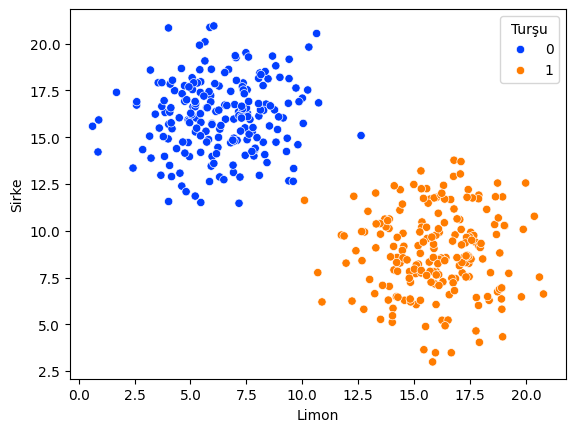

In [6]:
sns.scatterplot(x="Limon", y="Sirke", data=df, hue="Turşu", palette="bright")

In [7]:
X = df.drop("Turşu", axis=1)
y = df["Turşu"]

In [8]:
from sklearn.svm import SVC
# help(SVC)

In [9]:
from svm_margin_plot import plot_svm_boundary


### Linear Model

In [10]:
svc_model = SVC(kernel="linear")
svc_model.fit(X,y)

SVC(kernel='linear')

In [11]:
svc_model.C

1.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


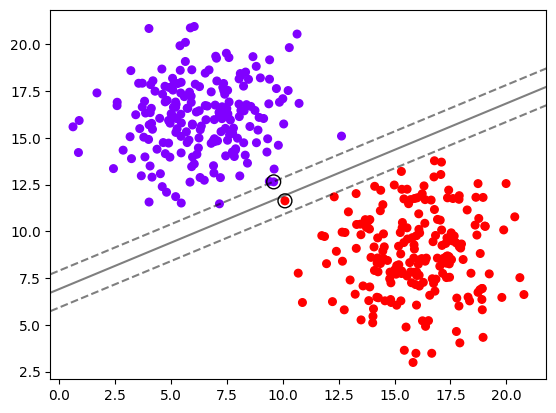

In [12]:
plot_svm_boundary(svc_model, X,y)

#### C = 500

In [13]:
svc_model = SVC(kernel="linear", C=500)
svc_model.fit(X,y)

SVC(C=500, kernel='linear')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


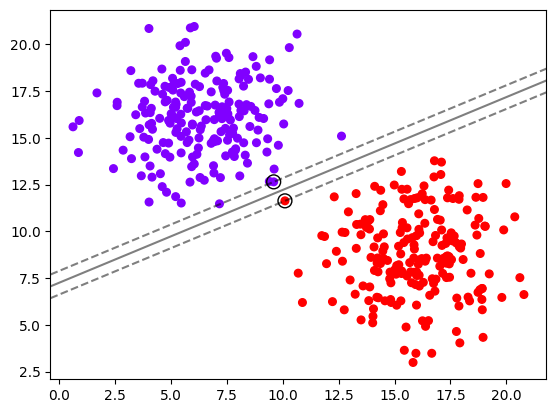

In [14]:
plot_svm_boundary(svc_model, X,y)

#### C = 0.01

In [17]:
svc_model = SVC(kernel="linear", C=0.01)
svc_model.fit(X,y)

SVC(C=0.01, kernel='linear')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


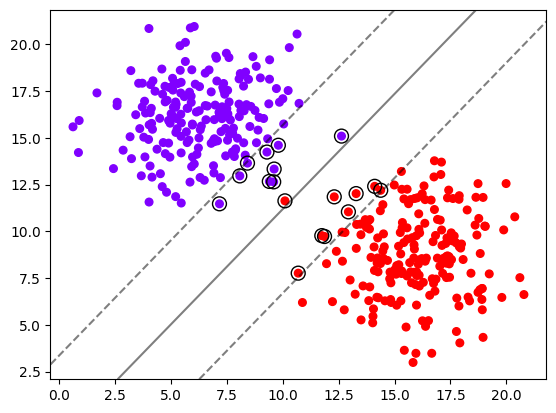

In [18]:
plot_svm_boundary(svc_model, X,y)

#### As we can see figure above, if C growths, bounds are getting tiny

### Radial Base Function

In [19]:
svm_model = SVC(kernel="rbf")
svm_model.fit(X,y)

SVC()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


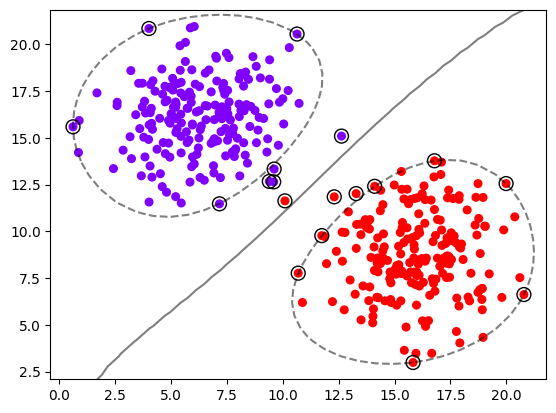

In [20]:
plot_svm_boundary(svm_model, X,y)

### Sigmoid

In [21]:
svm_model = SVC(kernel="sigmoid")
svm_model.fit(X,y)

SVC(kernel='sigmoid')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


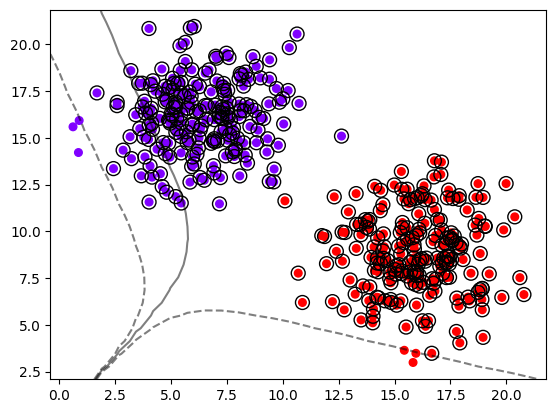

In [22]:
plot_svm_boundary(svm_model, X,y)

### gamma

In [23]:
svm_model = SVC(kernel="rbf", gamma=0.003)
svm_model.fit(X,y)

SVC(gamma=0.003)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


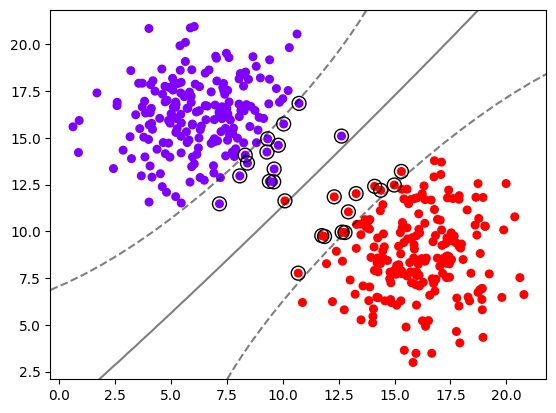

In [24]:
plot_svm_boundary(svm_model, X,y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


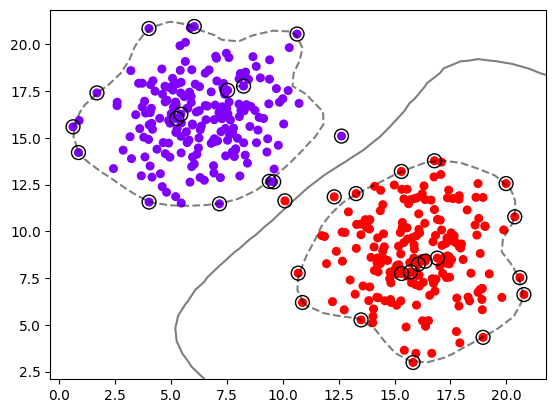

In [35]:
svm_model = SVC(kernel="rbf", gamma=0.1)
svm_model.fit(X,y)
plot_svm_boundary(svm_model, X,y)

### poly - Polinom Kernel

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


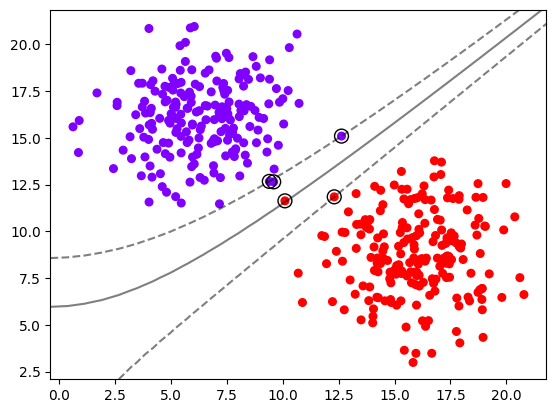

In [36]:
svm_model = SVC(kernel="poly", degree=2)
svm_model.fit(X,y)
plot_svm_boundary(svm_model, X,y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


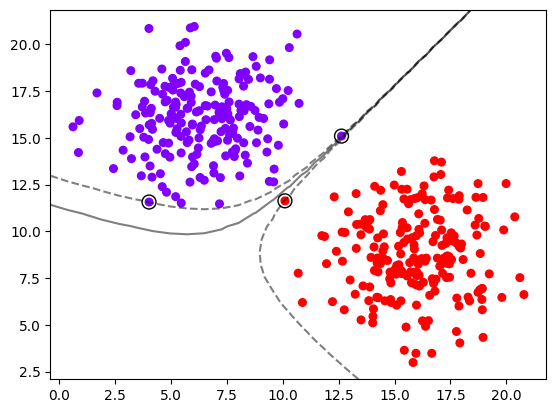

In [37]:
svm_model = SVC(kernel="poly", degree=9)
svm_model.fit(X,y)
plot_svm_boundary(svm_model, X,y)

## Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
svm = SVC()

C = 10.**np.arange(-4, 3)

parameters = {
    "C" : C,
    "kernel" : ["rbf","linear"]
}

In [40]:
grid = GridSearchCV(svm, parameters)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['rbf', 'linear']})

In [41]:
grid.best_score_

0.9974999999999999

In [42]:
grid.best_params_


{'C': 0.0001, 'kernel': 'rbf'}